In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("data/energy_france.csv", parse_dates=["datetime"])
df["datetime"] = pd.to_datetime(df["datetime"], utc=True).dt.tz_convert("Europe/Paris")

# Basic info
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50357 entries, 0 to 50356
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype                       
---  ------    --------------  -----                       
 0   datetime  50357 non-null  datetime64[ns, Europe/Paris]
 1   load_mw   50357 non-null  float64                     
dtypes: datetime64[ns, Europe/Paris](1), float64(1)
memory usage: 787.0 KB
None


,datetime,load_mw
0,2015-01-01 02:00:00+01:00,69773.0
1,2015-01-01 03:00:00+01:00,66417.0
2,2015-01-01 04:00:00+01:00,64182.0
3,2015-01-01 05:00:00+01:00,63859.0
4,2015-01-01 06:00:00+01:00,63921.0


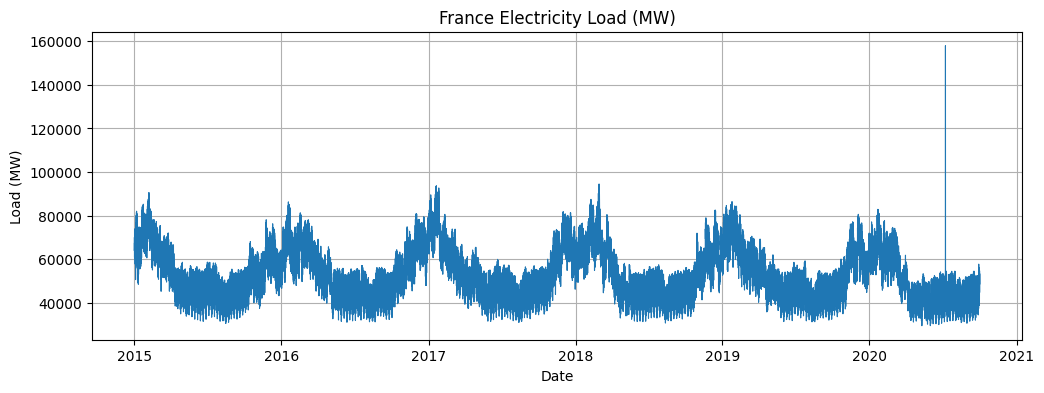

In [103]:
import matplotlib.pyplot as plt

# Remove rows with missing datetimes or load values
df_plot = df.dropna(subset=["datetime", "load_mw"]).copy()

# Remove timezone info (Matplotlib doesn't handle tz-aware datetimes well)
df_plot["datetime"] = df_plot["datetime"].dt.tz_localize(None)

# Plot
plt.figure(figsize=(12, 4))
plt.plot(df_plot["datetime"], df_plot["load_mw"], linewidth=0.8)
plt.title("France Electricity Load (MW)")
plt.xlabel("Date")
plt.ylabel("Load (MW)")
plt.grid(True)
plt.show()


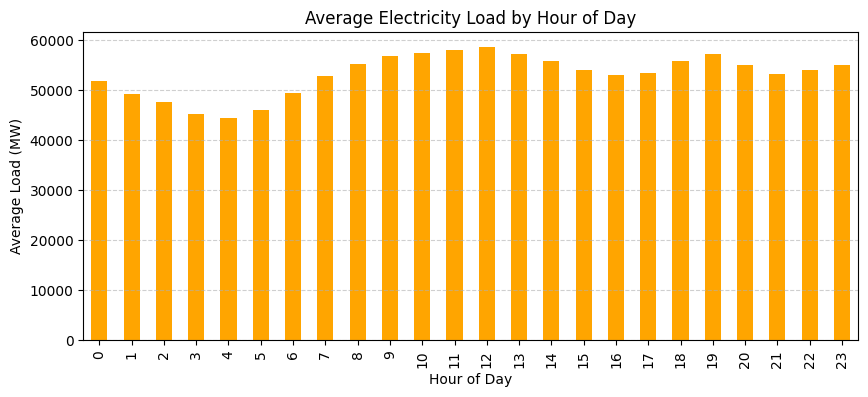

In [90]:
import matplotlib.pyplot as plt

# Add time features
df["hour"] = df["datetime"].dt.hour

# Average load by hour
avg_by_hour = df.groupby("hour")["load_mw"].mean()

plt.figure(figsize=(10, 4))
avg_by_hour.plot(kind="bar", color="orange")
plt.title("Average Electricity Load by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Load (MW)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


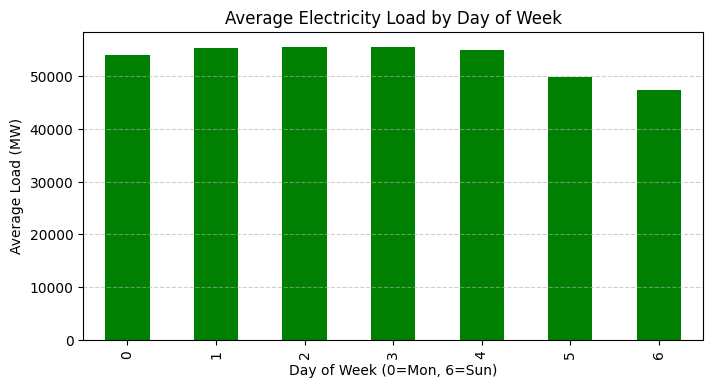

In [91]:
# Add day of week (0=Monday, 6=Sunday)
df["day_of_week"] = df["datetime"].dt.dayofweek

avg_by_day = df.groupby("day_of_week")["load_mw"].mean()

plt.figure(figsize=(8, 4))
avg_by_day.plot(kind="bar", color="green")
plt.title("Average Electricity Load by Day of Week")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Average Load (MW)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


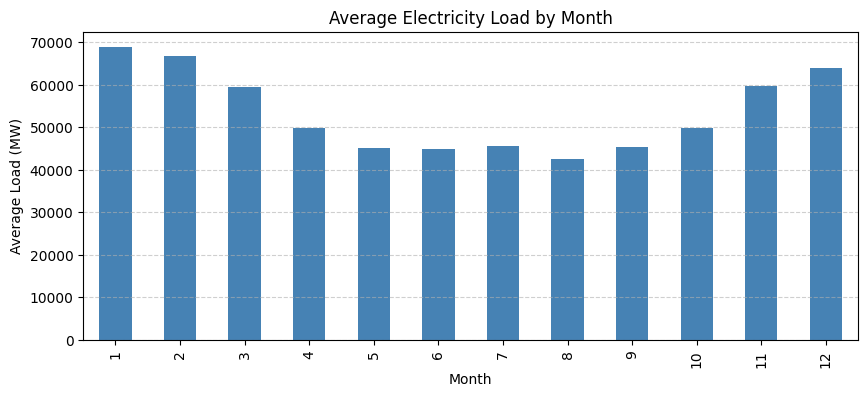

In [93]:
# Add month
df["month"] = df["datetime"].dt.month

avg_by_month = df.groupby("month")["load_mw"].mean()

plt.figure(figsize=(10, 4))
avg_by_month.plot(kind="bar", color="steelblue")
plt.title("Average Electricity Load by Month")
plt.xlabel("Month")
plt.ylabel("Average Load (MW)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


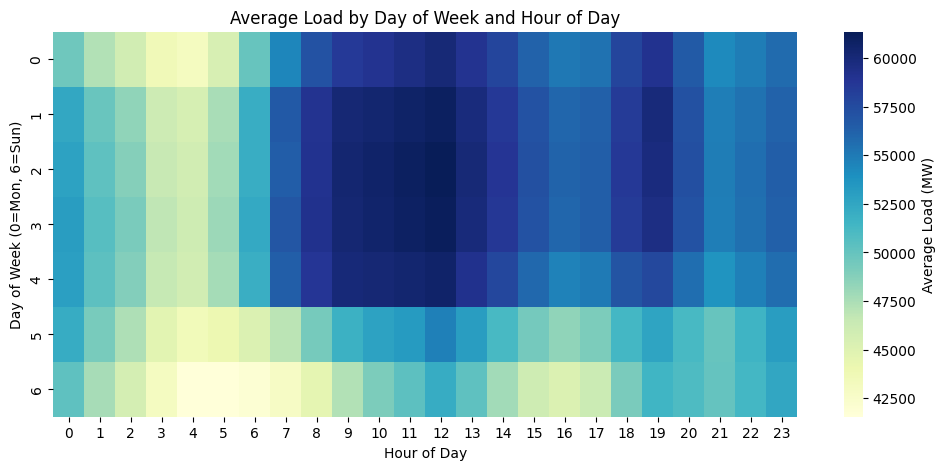

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create day-hour pivot table
pivot = df.pivot_table(
    index=df["datetime"].dt.dayofweek,
    columns=df["datetime"].dt.hour,
    values="load_mw",
    aggfunc="mean"
)

plt.figure(figsize=(12, 5))
sns.heatmap(pivot, cmap="YlGnBu", cbar_kws={'label': 'Average Load (MW)'})
plt.title("Average Load by Day of Week and Hour of Day", fontsize=12)
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week (0=Mon, 6=Sun)")
plt.show()


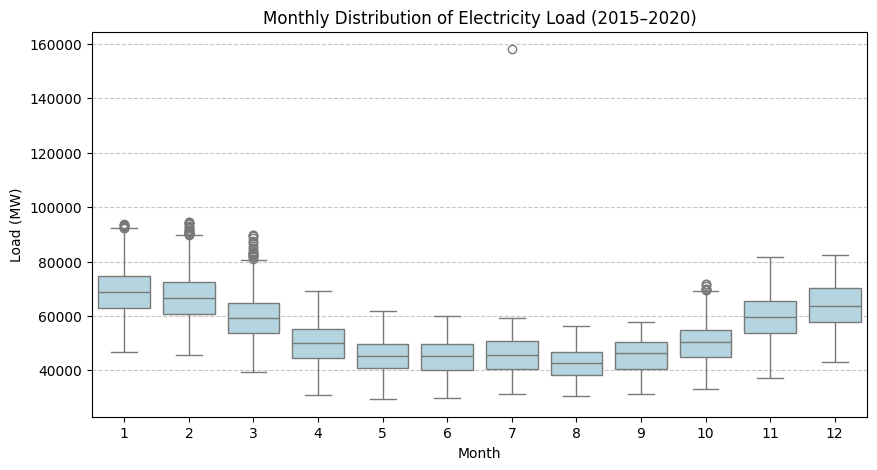

In [95]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["datetime"].dt.month, y=df["load_mw"], color="lightblue")
plt.title("Monthly Distribution of Electricity Load (2015–2020)")
plt.xlabel("Month")
plt.ylabel("Load (MW)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


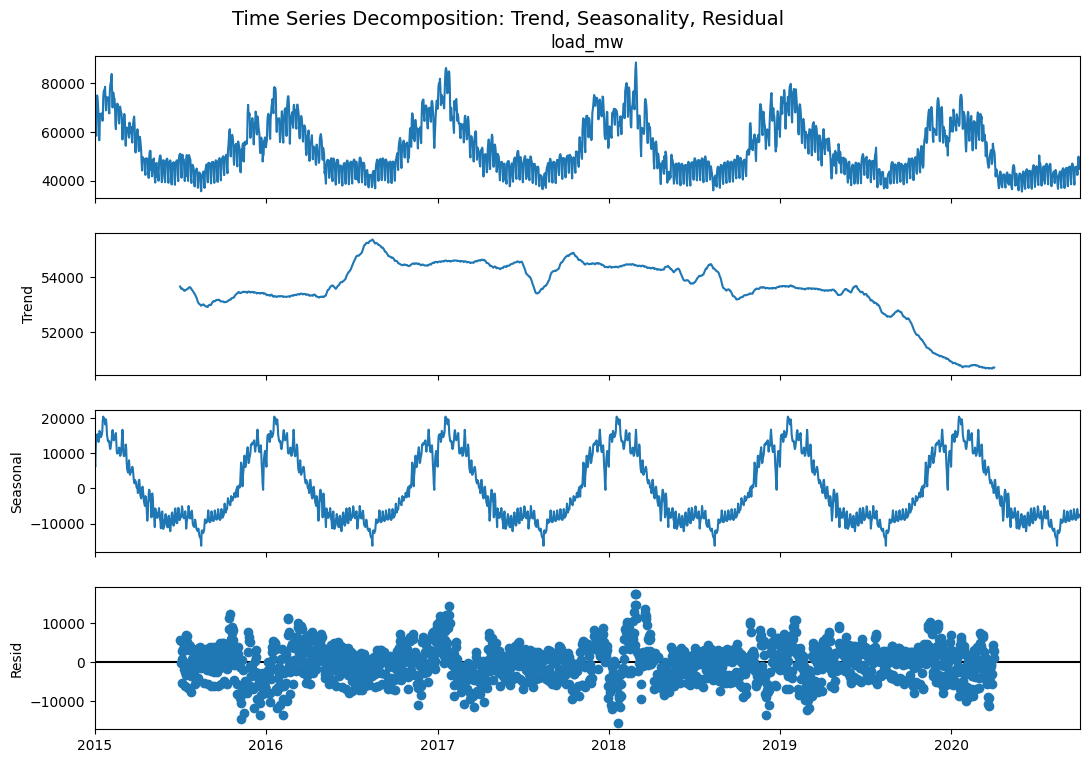

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample to daily mean to make decomposition clearer
df_daily = df.set_index("datetime").resample("D")["load_mw"].mean()

# Decomposition
decomposition = seasonal_decompose(df_daily, model="additive", period=365)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("Time Series Decomposition: Trend, Seasonality, Residual", fontsize=14)
plt.show()
